# Using CLIP for 0-shot classification and image search

Code authored by: Shaw Talebi <br>

[Blog link](https://towardsdatascience.com/multimodal-embeddings-an-introduction-5dc36975966f) <br>
[Video link](https://youtu.be/YOvxh_ma5qE)

### imports

In [1]:
from PIL import Image
from transformers import CLIPProcessor, CLIPModel

### functions

In [2]:
def classify_image(image, text_classes):
    """
        Helper function to do 0-shot image classfication with CLIP
    """

    # pass image and text classes to processor
    inputs = processor(text=text_classes, images=image, return_tensors="pt", padding=True)
    # pass inputs to CLIP
    outputs = model(**inputs) # note: "**" unpacks dictionary items
    logits_per_image = outputs.logits_per_image # image-text similarity score
    probs = logits_per_image.softmax(dim=1) # convert scores to probabilties via softmax
    # prediction
    predicted_class = text_classes[probs.argmax()]
    prob_class = round(float(probs[0][probs.argmax()]),4)

    return predicted_class, prob_class

In [3]:
def image_search(image_list, query):
    """
        Helper function to match query to an image in image_list
    """

    inputs = processor(text=query, images=image_list, return_tensors="pt", padding=True)
    outputs = model(**inputs)
    
    logits_per_text = outputs.logits_per_text
    probs = logits_per_text.softmax(dim=1)

    # best match
    best_match = image_list[probs.argmax()]
    prob_match = round(float(probs[0][probs.argmax()]),4)

    return best_match, prob_match

### Application 1: 0-shot Classification

In [4]:
# import model
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch16")

# import processor (handles text tokenization and image preprocessing)
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch16") 

#### cat vs dog

In [5]:
# load image
image = Image.open("images/cat_cute.png")

<img src="images/cat_cute.png" width="200"/>

In [6]:
# define text classes
text_classes = ["a photo of a cat", "a photo of a dog"]

# pass image and text classes to processor
inputs = processor(text=text_classes, images=image, return_tensors="pt", padding=True)

In [7]:
# pass inputs to CLIP
outputs = model(**inputs) # note: "**" unpacks dictionary items
logits_per_image = outputs.logits_per_image # image-text similarity score
probs = logits_per_image.softmax(dim=1) # convert scores to probabilties via softmax

In [8]:
# print prediction
predicted_class = text_classes[probs.argmax()]
print(predicted_class, "| Probability = ", round(float(probs[0][probs.argmax()]),4))

a photo of a cat | Probability =  0.9979


#### cat vs ugly

In [9]:
# define text classes
text_classes = ["ugly cat", "cute cat"]

predicted_class, prob_class = classify_image(image, text_classes)
print(predicted_class, "| Probability = ", prob_class)

cute cat | Probability =  0.9703


#### cat meme vs not cat meme

In [10]:
# define text classes
text_classes = ["cat meme", "not cat meme"]

predicted_class, prob_class = classify_image(image, text_classes)
print(predicted_class, "| Probability = ", prob_class)

not cat meme | Probability =  0.5464


In [11]:
# load image
image = Image.open("images/cat_meme.png")

<img src="images/cat_meme.png" width="200"/>

In [12]:
predicted_class, prob_class = classify_image(image, text_classes)
print(predicted_class, "| Probability = ", prob_class)

cat meme | Probability =  0.8338


### Application 2: Image Search

In [13]:
# create list of images to search over
image_name_list = ["images/cat_cute.png", "images/dog.png", "images/goat.png"]

image_list = []
for image_name in image_name_list:
    image_list.append(Image.open(image_name))

In [14]:
# define a query
query = "a cute dog"

In [15]:
# pass images and query to CLIP
inputs = processor(text=query, images=image_list, return_tensors="pt", padding=True)
outputs = model(**inputs)
logits_per_text = outputs.logits_per_text
probs = logits_per_text.softmax(dim=1)

Match probability:  0.9817


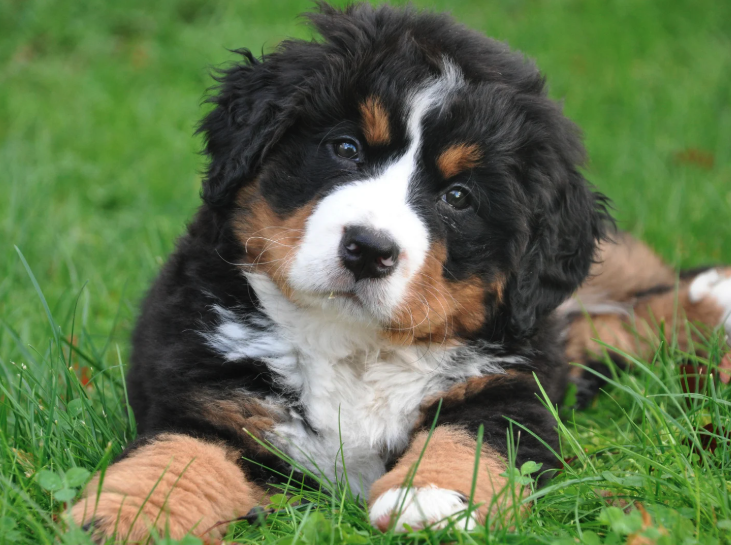

In [16]:
# print best match
best_match = image_list[probs.argmax()]
prob_match = round(float(probs[0][probs.argmax()]),4)

print("Match probability: ",prob_match)
display(best_match)

Match probability:  0.7715


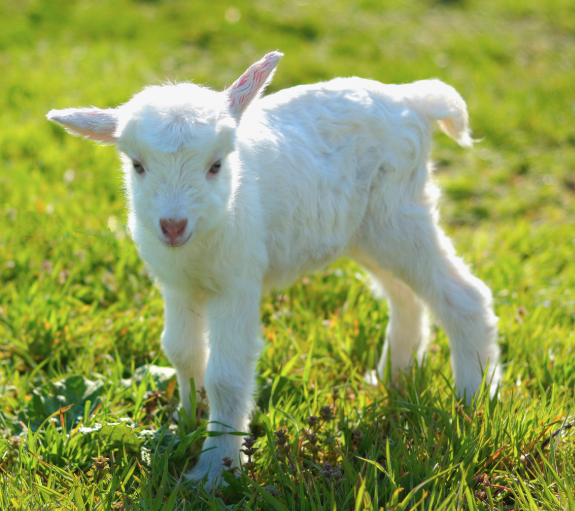

In [17]:
query = "something cute but metal 🤘"

best_match, prob_match = image_search(image_list, query)

print("Match probability: ",prob_match)
display(best_match)

Match probability:  0.8248


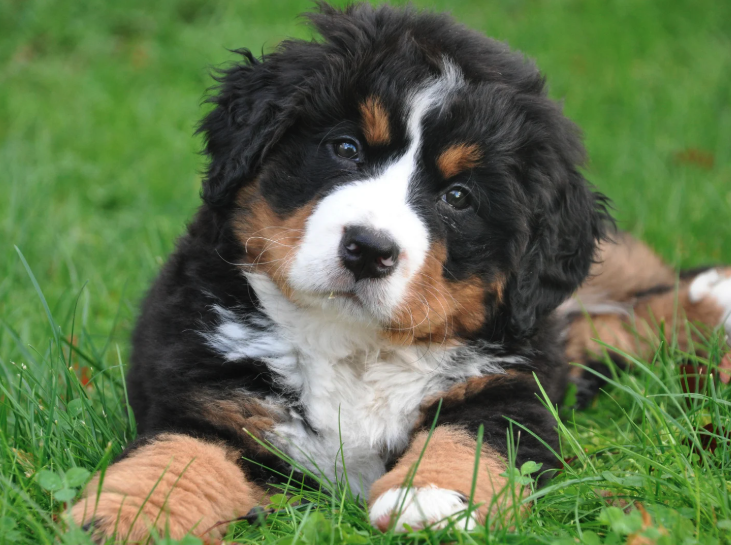

In [18]:
query = "a good boy"

best_match, prob_match = image_search(image_list, query)

print("Match probability: ",prob_match)
display(best_match)

Match probability:  0.5664


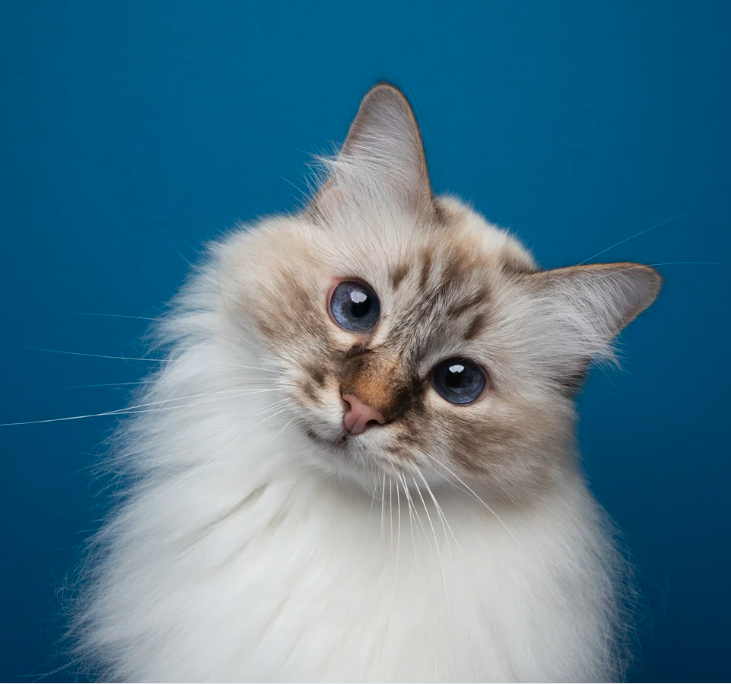

In [19]:
query = "the best pet in the world"

best_match, prob_match = image_search(image_list, query)

print("Match probability: ",prob_match)
display(best_match)